# ゼロから作るdeeplearning 4章 ニューラルネットワークの学習

## 4.2 損失関数（誤差関数）
回帰問題：2乗和誤差

分類問題:交差エントロピー誤差

損失関数とはNNの"悪さ"である。教師データに対してどれだけ適合していないかを表している。

NNは性能をより上げたい ＝ 性能の悪さを最小化したい

よって損失関数を最小にする方向に学習が進められる。

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# 二乗和誤差（Sum of Squared Errors, SSE）

二乗和誤差は、回帰分析や機械学習のモデル評価に用いられる指標の一つです。観測された値とモデルによって予測された値の間の差を測定し、その差を二乗した値の合計を計算します。これは、モデルの予測精度を評価するための一般的な方法です。

## 数式

二乗和誤差は次の数式で表されます。

$$
SSE = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

- $n$ はデータの総数です。
- $y_i$ は実際の観測値です。
- $\hat{y}_i$ は予測された値です。

## 解説

1. 各データポイントについて、実際の観測値 $y_i$ とモデルによって予測された値 $\hat{y}_i$ の差を計算します。
2. その差を二乗します。これは、正負にかかわらず誤差の大きさを考慮するためです。
3. すべての二乗誤差を合計します。

この合計値が二乗和誤差です。二乗和誤差が小さいほど、モデルの予測が実際の観測値に近いことを意味します。

## 例

次のようなデータがあるとします。

観測値: $ [3, -0.5, 2, 7] $
予測値: $ [2.5, 0.0, 2, 8] $

各データポイントについて、二乗誤差を計算します。

$$
\begin{align*}
(3 - 2.5)^2 & = 0.25 \\
(-0.5 - 0.0)^2 & = 0.25 \\
(2 - 2)^2 & = 0.0 \\
(7 - 8)^2 & = 1.0 \\
\end{align*}
$$

これらを合計して、二乗和誤差を求めます。

$$
SSE = 0.25 + 0.25 + 0.0 + 1.0 = 1.5
$$

## Pythonコードによる計算

以下に、Pythonコードを用いて二乗和誤差を計算する例を示します。

```python
import numpy as np

# 観測値と予測値
observed = np.array([3, -0.5, 2, 7])
predicted = np.array([2.5, 0.0, 2, 8])

# 二乗和誤差の計算
sse = np.sum((observed - predicted) ** 2)

print("二乗和誤差 (SSE):", sse)


In [155]:
# 2乗和誤差を実装する
def mean_squared_error(y, t):
	return 0.5 * np.sum((y - t) ** 2)

# 交差エントロピー誤差（Cross-Entropy Loss）

交差エントロピー誤差は、分類問題におけるモデル評価に用いられる指標の一つです。特に、ロジスティック回帰やニューラルネットワークなどの確率的分類モデルで広く使用されます。これは、実際のラベルと予測された確率分布の間の誤差を測定します。

## 数式

交差エントロピー誤差は次の数式で表されます。

$$
H(p, q) = -\sum_{i=1}^{n} p(x_i) \log q(x_i)
$$

- $n$ はデータの総数です。
- $p(x_i)$ は実際のラベル（正解）の確率分布です。
- $q(x_i)$ は予測された確率分布です。

二値分類の場合、交差エントロピー誤差は次のように表されます。

$$
H(p, q) = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

- $y$ は実際のラベル（0または1）です。
- $\hat{y}$ は予測された確率です。

## 解説

1. 実際のラベル $y$ が1の場合、交差エントロピー誤差は $-\log(\hat{y})$ となります。
2. 実際のラベル $y$ が0の場合、交差エントロピー誤差は $-\log(1 - \hat{y})$ となります。
3. これにより、予測確率が実際のラベルに近いほど、交差エントロピー誤差は小さくなります。

## 例

次のようなデータがあるとします。

観測値: $ [1, 0, 1, 0] $
予測確率: $ [0.9, 0.2, 0.8, 0.1] $

各データポイントについて、交差エントロピー誤差を計算します。

$$
\begin{align*}
-(1 \cdot \log(0.9) + (1 - 1) \cdot \log(1 - 0.9)) & = 0.105 \\
-(0 \cdot \log(0.2) + (1 - 0) \cdot \log(1 - 0.2)) & = 0.223 \\
-(1 \cdot \log(0.8) + (1 - 1) \cdot \log(1 - 0.8)) & = 0.223 \\
-(0 \cdot \log(0.1) + (1 - 0) \cdot \log(1 - 0.1)) & = 0.105 \\
\end{align*}
$$

これらを平均して、交差エントロピー誤差を求めます。

$$
H(p, q) = \frac{0.105 + 0.223 + 0.223 + 0.105}{4} = 0.164
$$

## Pythonコードによる計算

以下に、Pythonコードを用いて交差エントロピー誤差を計算する例を示します。

```python
import numpy as np

# 観測値と予測確率
observed = np.array([1, 0, 1, 0])
predicted = np.array([0.9, 0.2, 0.8, 0.1])

# 交差エントロピー誤差の計算
cross_entropy = -np.mean(observed * np.log(predicted) + (1 - observed) * np.log(1 - predicted))

print("交差エントロピー誤差:", cross_entropy)


<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_92713/1800649502.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x, y, label='$y = \log x$', color='blue')
/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_92713/1800649502.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$y = \log x$ (natural logarithm)')


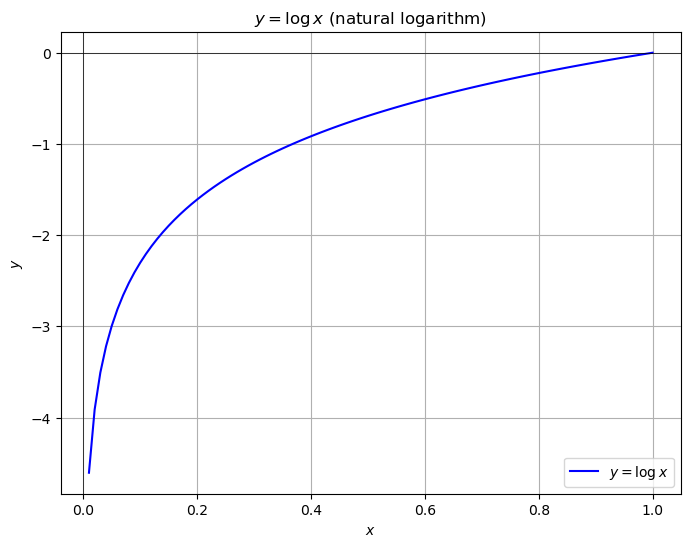

In [156]:
# 対数のグラフを描画する

# xの範囲を設定（0に近い正の値から10まで）
x = np.linspace(0.01, 1, 100)
y = np.log(x)

# グラフをプロット
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='$y = \log x$', color='blue')
plt.title('$y = \log x$ (natural logarithm)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


正解ラベルが1に対応する出力の自然対数を足し合わせる。

正解ラベルに対応する出力が大きければ大きいほど(1に近いほど)交差エントロピー誤差は0に近づく。

逆に出力が小さければ交差エントロピー誤差は大きくなる

In [157]:
# 交差エントロピー誤差を実装する
def cross_entropy_error(y, t):
	delta = 1e-7 # log(0)を防ぐための微小な値を追加しておく
	return -np.sum(t * np.log(y + delta))

In [158]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [159]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [160]:
# バッチ対応版の交差エントロピー誤差を実装する（one-hot表現の場合）
def cross_entropy_error(y, t):
	# 1次元の場合は、reshapeで2次元に変換する
	if y.ndim == 1:
		t = t.reshape(1, t.size)
		y = y.reshape(1, y.size)
	batch_size = y.shape[0]
	return -np.sum(t * np.log(y + 1e-7)) / batch_size

# # バッチ対応版の交差エントロピー誤差を実装する（ラベルで与えられた場合）
# def cross_entropy_error(y, t):
# 	# 1次元の場合は、reshapeで2次元に変換する
# 	if y.ndim == 1:
# 		t = t.reshape(1, t.size)
# 		y = y.reshape(1, y.size)
# 	batch_size = y.shape[0]
# 	return -np.sum(np.log(y[np.arange(batch_size)], t) + 1e-7) / batch_size

## 4.3 微分
### 数値微分

In [161]:
# 数値微分を実装
def numerical_diff(f, x):
	h = 1e-4 # 0.0001
	return (f(x + h) - f(x - h)) / (2 * h)

### 偏微分

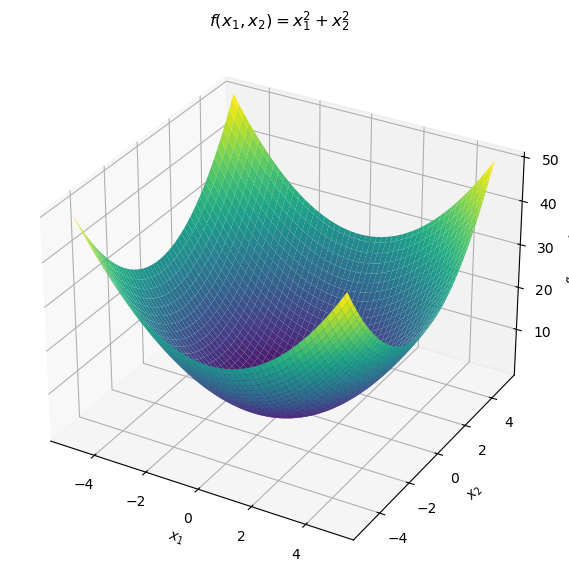

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 関数の定義
def f(x):
    return x[0]**2 + x[1]**2

# x1, x2 の範囲とメッシュグリッドの作成
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x1, x2)

# z の計算
z = f(np.array([x1, x2]))

# グラフの描画
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis')

# グラフのラベルとタイトル
ax.set_title('$f(x_1, x_2) = x_1^2 + x_2^2$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x_1, x_2)$')

plt.show()


In [163]:
# x1 = 3, x2 = 4 のときの x1 に対する偏微分を求める
def f1(x1):
	return x1**2 + 4.0**2.0

numerical_diff(f1, 3.0)

6.00000000000378

In [164]:
# x1 = 3, x2 = 4 のときの x2 に対する偏微分を求める
def f2(x2):
	return 3.0**2 + x2**2

numerical_diff(f2, 4.0)

7.999999999999119

## 4.4 勾配

In [165]:
# 勾配を求める（二つの変数の偏微分をまとめて求める）
def numerical_gradient(f, x):
	h = 1e-4
	# 勾配を保存する変数(xと同じ形状, xが2次元だったらgradも2次元)
	grad = np.zeros_like(x)
	for idx in range(x.size):
		tmp_val = x[idx]
		# f(x + h) の計算
		x[idx] = tmp_val + h
		fxh1 = f(x)
		# f(x - h) の計算
		x[idx] = tmp_val - h
		fxh2 = f(x)
		grad[idx] = (fxh1 - fxh2) / (2 * h)
		x[idx] = tmp_val
	return grad

In [166]:
print(numerical_gradient(f, np.array([3.0, 4.0])))
print(numerical_gradient(f, np.array([0.0, 2.0])))
print(numerical_gradient(f, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


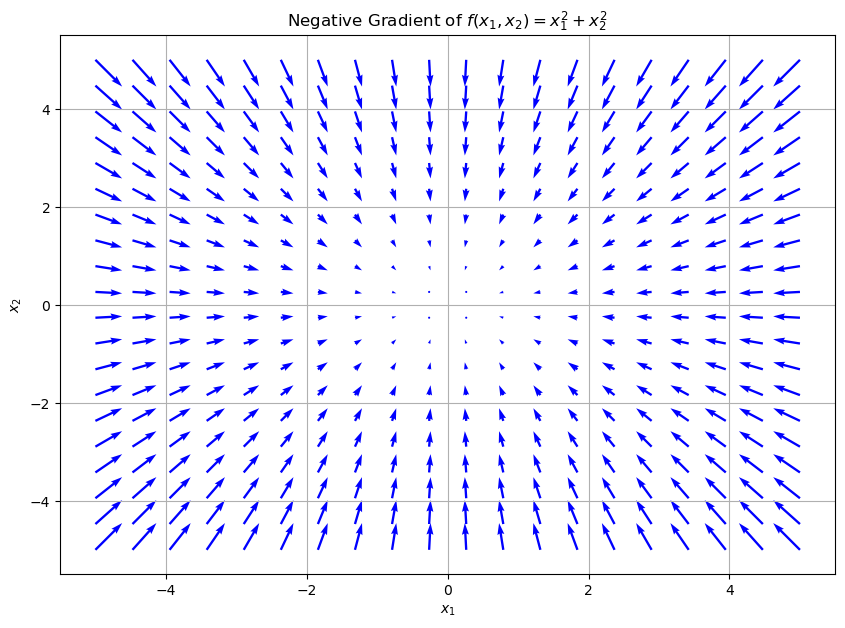

In [167]:
# 勾配の定義
def grad_f(x):
    df_dx1 = 2 * x[0]
    df_dx2 = 2 * x[1]
    return np.array([df_dx1, df_dx2])

# x1, x2 の範囲とメッシュグリッドの作成
x1 = np.linspace(-5, 5, 20)
x2 = np.linspace(-5, 5, 20)
x1, x2 = np.meshgrid(x1, x2)

# 勾配ベクトルの計算
u = np.zeros_like(x1)
v = np.zeros_like(x2)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        grad = grad_f(np.array([x1[i, j], x2[i, j]]))
        u[i, j] = -grad[0]  # 勾配の向きを逆にする
        v[i, j] = -grad[1]  # 勾配の向きを逆にする

# グラフの描画
plt.figure(figsize=(10, 7))
plt.quiver(x1, x2, u, v, color='blue')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Negative Gradient of $f(x_1, x_2) = x_1^2 + x_2^2$')
plt.grid()
plt.show()


In [168]:
## 勾配降下法を実装する（引数は最適化したい関数、初期値、 学習率lr=learning rate、繰り返しの数）
def gradient_descent(f, init_x, lr=0.01, step_num=100):
	x = init_x
	for i in range(step_num):
		grad = numerical_gradient(f, x)
		x -= lr * grad
	return x

$f(x_{1}, x_{2}) = x_{1}^2 + x_{2}^2$ の最小値を勾配降下法で求める

In [169]:
gradient_descent(f, np.array([-3.0, 4.0]), lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

ほぼ(0,0)の正しい値になった！

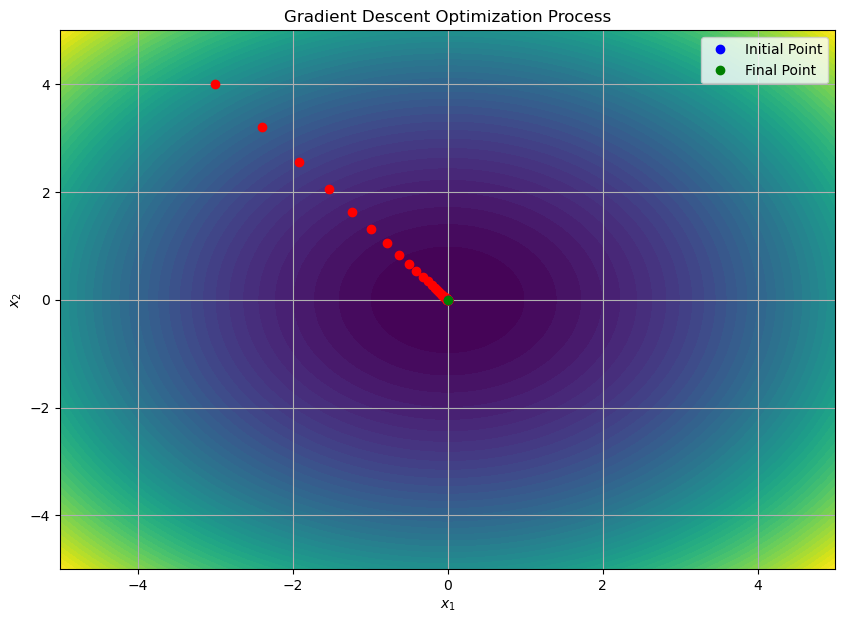

In [170]:
# x1, x2 の範囲とメッシュグリッドの作成
x1 = np.linspace(-5, 5, 100)
x2 = np.linspace(-5, 5, 100)
x1, x2 = np.meshgrid(x1, x2)
z = f(np.array([x1, x2]))

# グラフの描画
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.contourf(x1, x2, z, levels=50, cmap='viridis')
ax.plot(trajectory[:, 0], trajectory[:, 1], 'o', color='red')

# 初期点を強調表示
ax.plot(init_x[0], init_x[1], 'bo', label='Initial Point')
# 最終点を強調表示
ax.plot(final_x[0], final_x[1], 'go', label='Final Point')

# 各更新ステップを点でプロット
ax.scatter(trajectory[:, 0], trajectory[:, 1], color='red', s=10)

# グラフのラベルとタイトル
ax.set_title('Gradient Descent Optimization Process')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()
ax.grid()

plt.show()


In [171]:
def softmax(a):
	c = np.max(a)
	exp_a = np.exp(a - c)
	sum_exp_a = np.sum(exp_a)
	return exp_a / sum_exp_a

In [172]:
class SimpleNet:
	def __init__(self):
		self.W = np.random.randn(2, 3) # ガウス分布で初期化

	def predict(self, x):
		return np.dot(x, self.W)

	def loss(self, x, t):
		z = self.predict(x)
		y = softmax(z)
		loss = cross_entropy_error(y, t)
		return loss

In [173]:
# インスタンス生成
net = SimpleNet()
print (net.W)

[[ 0.89671837  0.62547843  1.36367547]
 [ 0.79047478  1.30552813 -1.48644096]]


In [174]:
# 入力データから推論
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[ 1.24945832  1.55026238 -0.51959158]


In [175]:
# 正解ラベルから損失関数を求める
t = np.array([0, 0, 1])
net.loss(x, t)

2.693878396929536

In [176]:
# 数値微分、xが配列で渡されても対応できるように修正
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    # np.nditerを使って多次元配列の要素にアクセス
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    # 配列が終わるまで回す
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        
        # f(x + h) の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x - h) の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val  # 値を元に戻す
        
        it.iternext()
        
    return grad

In [177]:
f_tmp = lambda w: net.loss(x, t)
dW = numerical_gradient(f_tmp, net.W)
print(dW)

[[ 0.23795896  0.32146937 -0.55942832]
 [ 0.35693843  0.48220405 -0.83914249]]


## 2層のネットワーク作成

ガウス分布（ガウスぶんぷ）、または正規分布（せいきぶんぷ）は、確率論と統計学において非常に重要な分布です。この分布は多くの自然現象や測定値が従うとされ、統計解析やデータサイエンスで広く用いられています。ガウス分布はその特徴的な鐘型曲線からベルカーブ（bell curve）とも呼ばれます。

### ガウス分布の定義

ガウス分布は次の確率密度関数（PDF）によって定義されます：

$$
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

ここで：
- $x$ は連続変数。
- $\mu$ は平均（mean）で、分布の中心位置を示します。
- $\sigma^2$ は分散（variance）で、分布の広がりを示します。$\sigma$ は標準偏差（standard deviation）です。

### 特徴

1. **対称性**: ガウス分布は平均 $\mu$ を中心に左右対称です。
2. **平均と分散**: 平均 $\mu$ が分布の中心であり、標準偏差 $\sigma$ がデータの散らばり具合を表します。
3. **標準正規分布**: 平均が0、分散が1のガウス分布は特に標準正規分布と呼ばれ、次のように表されます：
   $$
   f(x; 0, 1) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{x^2}{2}\right)
   $$

### ガウス分布の用途

1. **統計学と機械学習**: ガウス分布は仮定として広く使用され、例えば線形回帰や主成分分析（PCA）などの手法で仮定されています。
2. **自然現象のモデリング**: 身長、血圧、測定誤差など多くの自然現象が近似的にガウス分布に従います。
3. **中央極限定理**: 独立したランダム変数の和が正規分布に近づくという定理は、ガウス分布の普遍性を説明します。

### まとめ

ガウス分布は、多くの自然現象や統計的データのモデリングにおいて基本的な役割を果たします。その特性や用途を理解することは、統計学や機械学習の基礎を理解する上で非常に重要です。

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_92713/2246720748.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')
/var/folders/5k/0bfc6pzn3z9_z6xn1rvv40sr0000gn/T/ipykernel_92713/2246720748.py:17: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')


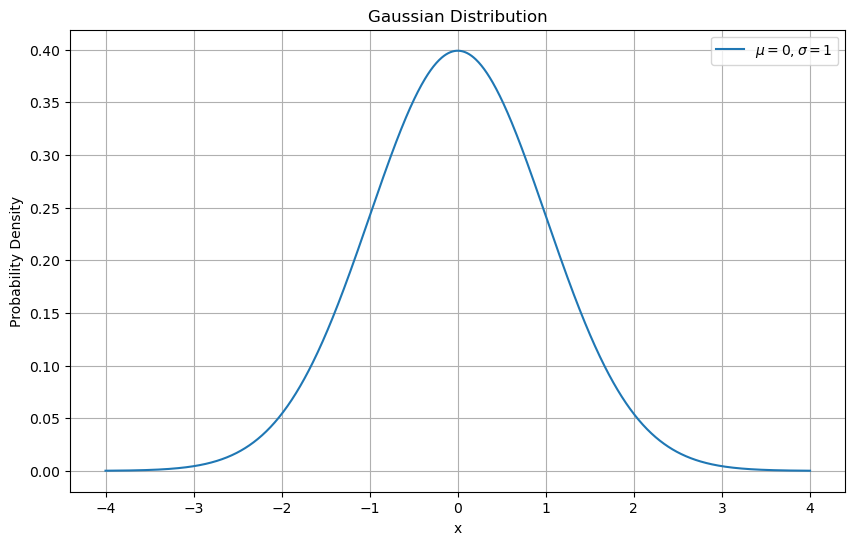

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 平均と標準偏差
mu = 0
sigma = 1

# x軸の値
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# ガウス分布の確率密度関数
y = norm.pdf(x, mu, sigma)

# グラフの描画
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'$\mu={mu}, \sigma={sigma}$')
plt.title('Gaussian Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [179]:
# 3章でやったシグモイド関数を再実装（下の2層ネットワークの活性化関数として使用）
def sigmoid(x):
	return 1 / (1 + np.exp(-x))

In [180]:
class TwoLayerNet:
	def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
		# 重みは上記のガウス分布を用いて初期化、バイアスは1次元の0で初期化
		self.params = {}
		self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
		self.params['b1'] = np.zeros(hidden_size)
		self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
		self.params['b2'] = np.zeros(output_size)

	def predict(self, x):
		W1, W2 = self.params['W1'], self.params['W2']
		b1, b2 = self.params['b1'], self.params['b2']

		a1 = np.dot(x, W1) + b1
		z1 = sigmoid(a1)
		a2 = np.dot(z1, W2) + b2
		y = softmax(a2)
		return y
	
	# 多クラス分類のため損失関数はクロスエントロピー誤差
	def loss(self, x, t):
		y = self.predict(x)
		return cross_entropy_error(y, t)
	
	def accuracy(self, x, t):
		y = self.predict(x)
		y = np.argmax(y, axis=1)
		t = np.argmax(t, axis=1)
		accuracy = np.sum(y == t) / float(x.shape[0])
		return accuracy

	def numerical_gradient(self, x, t):
		loss_W = lambda W: self.loss(x, t)
		grads = {}
		grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
		grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
		grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
		grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
		return grads

### ミニバッチ学習

In [181]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# TensorFlowのデータセットAPIを使ってMNISTデータセットを読み込む
mnist = tf.keras.datasets.mnist

# データセットを訓練データとテストデータに分割
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# flatten処理を適用して、28x28の画像を1次元配列（784次元）に変換
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# 画像データを標準化（0から1の範囲にスケーリング）
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# ラベルデータをone-hotエンコード
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# データの形状を確認
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')


x_train shape: (60000, 784), y_train shape: (60000, 10)
x_test shape: (10000, 784), y_test shape: (10000, 10)


In [182]:
# ハイパーパラメータ
iters_num = 10000  # 繰り返しの回数
train_size = x_train.shape[0]
batch_size = 100  # バッチサイズ
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []
# 1epocあたりの繰り返し回数
iter_per_epoch = max(train_size / batch_size, 1)

# 先ほど定義した2層のネットワークを使用
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
	# ミニバッチの取得
	batch_mask = np.random.choice(train_size, batch_size)
	x_batch = x_train[batch_mask]
	y_batch = y_train[batch_mask]

	# 勾配の計算（次の章でやる誤差逆伝播法に置き換えると高速になるよ！）
	grad = network.numerical_gradient(x_batch, y_batch)

	# パラメータの更新
	for key in ('W1', 'b1', 'W2', 'b2'):
		network.params[key] -= learning_rate * grad[key]

	# 学習経過の記録
	loss = network.loss(x_batch, y_batch)
	train_loss_list.append(loss)

	# 1エポックごとに認識精度を計算
	if i % iter_per_epoch == 0:
		train_acc = network.accuracy(x_train, y_train)
		test_acc = network.accuracy(x_test, y_test)
		train_acc_list.append(train_acc)
		test_acc_list.append(test_acc)
		print(f'epoch: {i//iter_per_epoch}, train acc: {train_acc:.4f}, test acc: {test_acc:.4f}')

epoch: 0.0, train acc: 0.0993, test acc: 0.1032
